**Name - NIM**
Tjok Istri Vicky Savitri - 0706022210027

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

from imblearn.combine import SMOTEENN

## Load Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/Bank.csv', delimiter=';')
data.head()

# mengimport datasets ke pandas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
data.info()

#total ada sebanyal 4521 data dengan total kolom 17 dan tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
data.describe()
# Describe menampilkan count, mean, standar deviation, min, max, 25%, 50%, dan 75% dari atribut yang berupa angka dari kolom2 numerik dataset ini.

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.isnull().sum()

# Datanya bersih

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
data['job'] = data['job'].replace('admin.', 'management')
data.head()
# Mengubah nilai admin. menjadi management

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<ipython-input-7-d5670a0e6484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette="Set2")


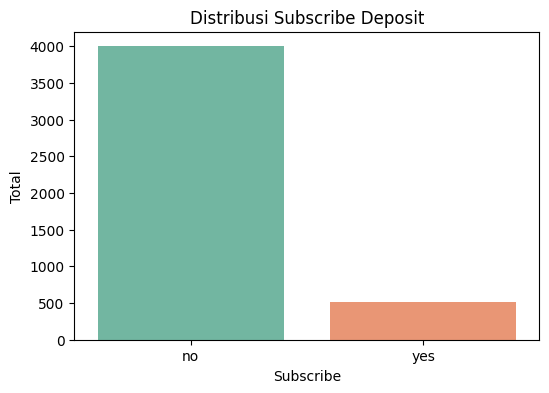

In [7]:
# Visualiasi
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=data, palette="Set2")
plt.title('Distribusi Subscribe Deposit')
plt.xlabel('Subscribe')
plt.ylabel('Total')
plt.show()

# Jumlah orang yang berlangganan deposit hanya sekitar 500 orang dari 4521 orang. Sedangkan yang tidak adalah 4000

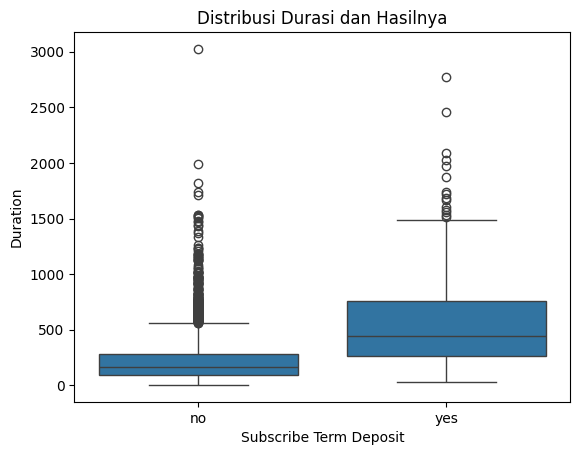

In [8]:
sns.boxplot(x='y', y='duration', data=data)
plt.title("Distribusi Durasi dan Hasilnya")
plt.xlabel("Subscribe Term Deposit")
plt.ylabel("Duration")
plt.show()

# Dari boxplot dibawah dapat diketahui bahwa bila durasinya diatas 1500 detik kemungkinan pelanggan untuk subscribe deposit lebih besar.

In [9]:
label_encoder = LabelEncoder()

columns_to_encode = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    "poutcome",
    "y"
]

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

data['month']=data['month'].apply(lambda x:0 if x =="jan" else 1 if x =='feb'
                                                  else 2 if x =='mar' else 3 if x =='apr'
                                                    else 4 if x == 'may' else 5 if x == 'jun'
                                                     else 6 if x == 'jul' else 7 if x == 'aug'
                                                       else 8 if x == 'sep' else 9 if x == 'oct'
                                                        else 10 if x == 'nov' else 11 if x == 'dec'
                                                        else x)

data.head()

# Mengubah seluruh nilai pada kolom diagnosis yang awalnya categorical menajadi numeric.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,9,79,1,-1,0,3,0
1,33,6,1,1,0,4789,1,1,0,11,4,220,1,339,4,0,0
2,35,3,2,2,0,1350,1,0,0,16,3,185,1,330,1,0,0
3,30,3,1,2,0,1476,1,1,2,3,5,199,4,-1,0,3,0
4,59,0,1,1,0,0,1,0,2,5,4,226,1,-1,0,3,0


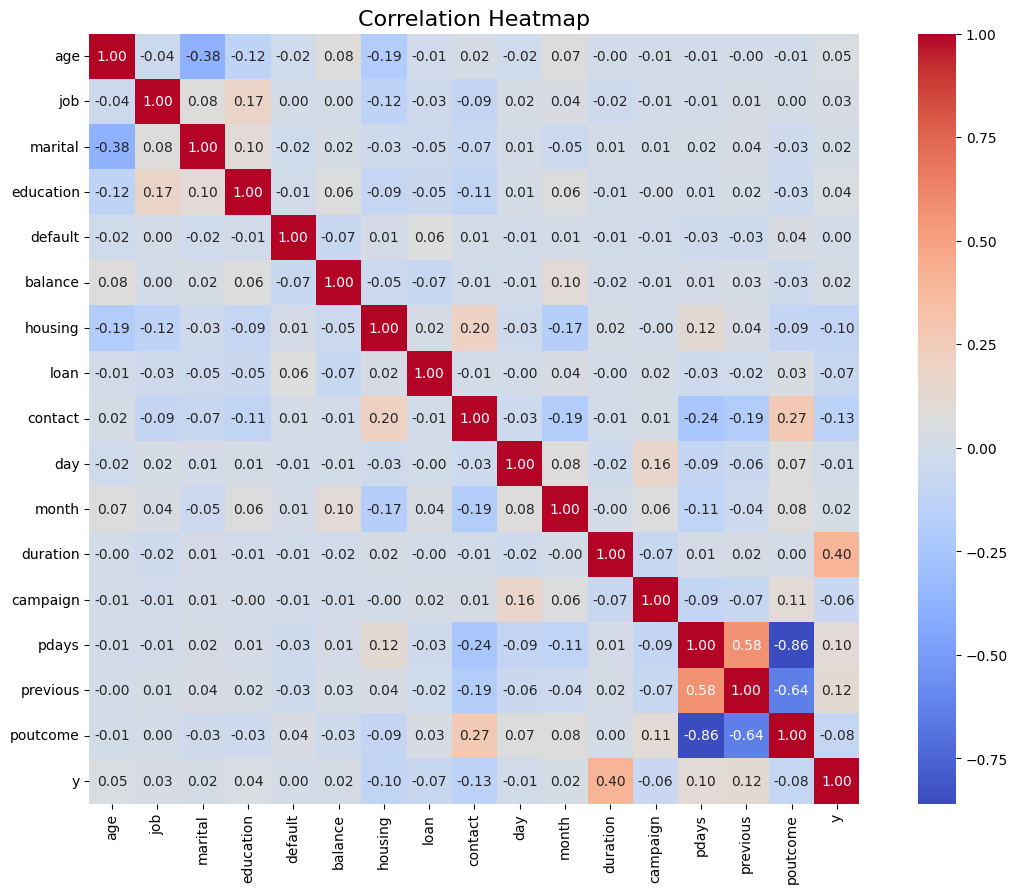

In [10]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Variabel durasi memiliki kolerasi sebesar 0.4 dengan variabel y
# Variabel pdays memiliki kolerasi sebesar 0.58 dengan variabel previous

## Machine Learning (Split Data)

In [11]:
# X = data.drop(['y'], axis = 1)
X = data[['duration', 'pdays', 'previous']]
y = data['y']

# X digunakan untuk membuat prediksi, y adalah target atau output yang ingin diprediksi.

In [12]:
# MENGGUNAKAN SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smoteenn.fit_resample(X, y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_train_sm, y_train_sm, test_size = 0.2, random_state = 42) # INI UNTUK YG SMOTEENN AGAR BISA DIBANDINGKAN
# Membagi dataset X dan y menjadi training dan testing data dengan pembagian 80% untuk training dan 20% untuk testing

X_train.shape, X_test.shape
# Menampilkan ukuran atau dimensi dari data latih (X_train) dan data uji (X_test) dalam bentuk tuple.

((3616, 3), (905, 3))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [14]:
#a
rf_sm = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

rndForest = RandomForestClassifier(n_estimators = 100, random_state=42)
rndForest.fit(X_train, y_train)

# Membuat model Random Forest Classifier

RandomForestClassifier(random_state=42)

In [15]:
#b
y_pred_rf_sm = rf_sm.predict(X_test_sm)
y_pred_rndForest = rndForest.predict(X_test)

# Untuk menghasilkan prediksi menggunakan Random Forest.

In [16]:
#c
accuracy1 = accuracy_score(y_test_sm, y_pred_rf_sm)
accuracy2 = accuracy_score(y_test, y_pred_rndForest)

print(f"Accuracy Score using SMOTEEN: {accuracy1:.4f}")
print(f"Accuracy Score: {accuracy2:.4f}")

# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_rndForest, y_test_sm dan y_pred_rf_sm.

Accuracy Score using SMOTEEN: 0.9901
Accuracy Score: 0.8928


In [17]:
#d
cm_rndForest = confusion_matrix(y_test, y_pred_rndForest)

cm_rndForestSM = confusion_matrix(y_test_sm, y_pred_rf_sm)

print("Confusion Matrix Random Forest:")
print(cm_rndForest)

print("\nConfusion Matrix Random Forest SMOTEENN:")
print(cm_rndForestSM)

# Menampilkan confusion matrix dari Random Forest

Confusion Matrix Random Forest:
[[772  35]
 [ 62  36]]

Confusion Matrix Random Forest SMOTEENN:
[[590   8]
 [  2 413]]


In [18]:
#e
print("Classification Report Random Forest Tanpa SMOTEENN")
print(classification_report(y_test, y_pred_rndForest))

print("\nClassification Report Random Forest SMOTEENN")
print(classification_report(y_test_sm, y_pred_rf_sm))

# Menampilkan classification report dari Random Forest

Classification Report Random Forest Tanpa SMOTEENN
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.51      0.37      0.43        98

    accuracy                           0.89       905
   macro avg       0.72      0.66      0.68       905
weighted avg       0.88      0.89      0.89       905


Classification Report Random Forest SMOTEENN
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       598
           1       0.98      1.00      0.99       415

    accuracy                           0.99      1013
   macro avg       0.99      0.99      0.99      1013
weighted avg       0.99      0.99      0.99      1013



In [19]:
#f
# Hasil kelas 1 radient boosting tanpa smoteeen memiliki precision, recall, f1-score yang rendah dibandingkan yang lainnya.
# Hasil kelas 0 dan 1 dari model Random Forest dengan SMOTEENN sangatlah bagus.
# Hasil dari random forest menggunakan smoteenn jauh lebih baik dari kelas 0 maupun 1 menghasilkan precision, recall, f1-score yang tinggi dibandingkan Random Forest tanpa SMOTEENN

## Gradient Boosting Classifier


a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [20]:
#a
grad = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features=3)
grad.fit(X_train, y_train)

grad_sm = GradientBoostingClassifier(random_state=42)
grad_sm.fit(X_train_sm, y_train_sm)

# Membuat model Gradient Boosting Classifier

GradientBoostingClassifier(random_state=42)

In [21]:
#b
y_pred_grad = grad.predict(X_test)
y_pred_gradSM = grad_sm.predict(X_test_sm)

# Untuk menghasilkan prediksi menggunakan Gradient Boosting Classifier

In [22]:
#c
accuracy1 = accuracy_score(y_test_sm, y_pred_gradSM)
accuracy2 = accuracy_score(y_test, y_pred_grad)

print(f"Accuracy Score using SMOTEEN: {accuracy1:.4f}")
print(f"Accuracy Score without SMOTEEN: {accuracy2:.4f}")

# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_grad, y_test_sm dan y_pred_gradSM.

Accuracy Score using SMOTEEN: 0.9783
Accuracy Score without SMOTEEN: 0.8939


In [23]:
#d
cm_grad = confusion_matrix(y_test, y_pred_grad)

cm_gradSM = confusion_matrix(y_test_sm, y_pred_gradSM)

print("Confusion Matrix Random Forest:")
print(cm_grad)

print("\nConfusion Matrix Random Forest SMOTEENN:")
print(cm_gradSM)

# Menampilkan confusion matrix dari Random Forest

Confusion Matrix Random Forest:
[[784  23]
 [ 73  25]]

Confusion Matrix Random Forest SMOTEENN:
[[582  16]
 [  6 409]]


In [24]:
#e
print("Classification Report Gradient Boosting Classifier Tanpa SMOTEENN")
print(classification_report(y_test, y_pred_grad))

print("\nClassification Report Gradient Boosting Classifier SMOTEENN")
print(classification_report(y_test_sm, y_pred_gradSM))

# Menampilkan classification report dari Random Forest

Classification Report Gradient Boosting Classifier Tanpa SMOTEENN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.52      0.26      0.34        98

    accuracy                           0.89       905
   macro avg       0.72      0.61      0.64       905
weighted avg       0.87      0.89      0.88       905


Classification Report Gradient Boosting Classifier SMOTEENN
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       598
           1       0.96      0.99      0.97       415

    accuracy                           0.98      1013
   macro avg       0.98      0.98      0.98      1013
weighted avg       0.98      0.98      0.98      1013



In [24]:
#f

# Hasil kelas 1 radient boosting tanpa smoteeen memiliki precision, recall, f1-score yang rendah dibandingkan yang lainnya.
# Hasil kelas 0 dan 1 dari model Random Forest dengan SMOTEENN sangatlah bagus.
# Hasil dari gradient boosting menggunakan smoteenn jauh lebih baik dari kelas 0 maupun 1 menghasilkan precision, recall, f1-score yang tinggi dibandingkan gradient boosting tanpa SMOTEENN.
# Secara keseluruhan model Random Forest lebih baik daripada Gradient Boosting Classifier.